In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\Nate\Downloads\HeyNathan.csv', sep=',')

In [4]:
df.describe()

,Y,value,momentum,size,liquidity,beta,mv,pw,sector,region
count,94320.000000,94320.000000,94320.000000,94320.000000,94320.000000,94320.000000,9.432000e+04,92706.000000,94320.000000,94320.000000
mean,0.105235,0.250728,-0.272436,-0.967038,0.394107,-0.223039,4.651464e+10,0.000690,33.027778,2.911249
std,2.012545,1.004138,1.009752,0.999278,0.992464,0.991945,1.650167e+11,0.002409,13.194892,1.893579
min,-25.000000,-2.781925,-3.294864,-3.474559,-4.262909,-2.603671,0.000000e+00,0.000000,10.000000,1.000000
25%,-0.683491,-0.373806,-0.949492,-1.777650,-0.193318,-0.963294,7.782501e+09,0.000000,20.000000,1.000000
50%,0.086910,0.317181,-0.223724,-1.036442,0.338113,-0.301010,1.658312e+10,0.000000,35.000000,3.000000
75%,0.979209,0.951863,0.408108,-0.183055,0.941767,0.362288,3.849866e+10,0.000000,40.000000,4.000000
max,25.000000,3.584209,2.789670,1.918073,5.358257,2.710191,3.444759e+12,0.040671,60.000000,6.000000


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.sort_values('date', ascending=True)

,date,Y,value,momentum,size,liquidity,beta,mv,pw,sector,region
4095,2024-06-28,1.212394,1.224449,-0.740504,0.404372,-0.627635,-1.129758,1.733842e+11,0.009937,50,1
8172,2024-06-28,-1.675522,1.094091,-0.312042,-1.011982,0.813082,0.152057,3.787258e+10,0.000000,20,1
47478,2024-06-28,3.987896,0.187131,1.118345,-1.153323,0.207326,-1.429306,8.548064e+09,0.000000,40,6
36744,2024-06-28,1.634753,1.861681,0.011263,0.342535,0.228163,0.025039,2.421380e+10,0.000000,15,5
66718,2024-06-28,0.082886,0.240827,0.022601,-0.456924,-0.609775,-0.231112,6.431815e+10,0.000000,45,1
...,...,...,...,...,...,...,...,...,...,...,...
4090,2024-09-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.980582e+10,NaN,20,1
80424,2024-09-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.326654e+10,NaN,30,3
23471,2024-09-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.247783e+10,NaN,15,1
70576,2024-09-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.167491e+10,NaN,45,1


In [7]:
mask = (df['date'] > '2024-06-28') & (df['date'] <= '2024-09-25')
df = df.loc[mask]

In [8]:
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

            date         Y  value  momentum  size  liquidity  beta  \
19617 2024-08-07 -0.533402    0.0       0.0   0.0        0.0   0.0   
19620 2024-08-08  0.408554    0.0       0.0   0.0        0.0   0.0   
19622 2024-08-15  0.769603    0.0       0.0   0.0        0.0   0.0   
19623 2024-08-12  0.511146    0.0       0.0   0.0        0.0   0.0   
19624 2024-08-14 -0.763732    0.0       0.0   0.0        0.0   0.0   
...          ...       ...    ...       ...   ...        ...   ...   
69338 2024-09-13  0.203896    0.0       0.0   0.0        0.0   0.0   
69339 2024-09-25  1.219857    0.0       0.0   0.0        0.0   0.0   
69340 2024-09-23 -0.840586    0.0       0.0   0.0        0.0   0.0   
69342 2024-09-24 -2.241373    0.0       0.0   0.0        0.0   0.0   
69343 2024-09-20  0.458002    0.0       0.0   0.0        0.0   0.0   

                 mv  pw  sector  region  
19617  7.887005e+09 NaN      55       1  
19620  7.844936e+09 NaN      55       1  
19622  7.808877e+09 NaN      55  

In [9]:
df['pw'] = df['pw'].fillna(0)

In [10]:
# Create benchmark region and sector weights
df['bw'] = df.groupby('region')['mv'].transform(lambda x: x / x.sum())
df['sw'] = df.groupby('sector')['mv'].transform(lambda x: x / x.sum())

In [11]:
df.head()

,date,Y,value,momentum,size,liquidity,beta,mv,pw,sector,region,bw,sw
0,2024-07-02,3.360534,-0.728185,1.413036,-0.619258,-0.925367,0.510556,1.041268e+10,0.0,15,3,0.000065,0.000067
1,2024-07-03,0.836051,-0.757901,1.374731,-0.618776,-0.931201,0.520348,1.083477e+10,0.0,15,3,0.000068,0.000070
2,2024-07-01,-1.419783,-0.753074,1.453158,-0.623217,-0.924397,0.523207,1.053598e+10,0.0,15,3,0.000066,0.000068
3,2024-07-04,1.520038,-0.766457,1.341935,-0.598109,-0.931897,0.514936,1.092706e+10,0.0,15,3,0.000068,0.000070
5,2024-07-10,-0.182980,-0.777926,1.250876,-0.568108,-0.936640,0.527490,1.105945e+10,0.0,15,3,0.000069,0.000071


### Calculating Geometric Total Returns $R$

$$
R = \left(\prod_{i=1}^t(1+R_{t})\right)-1
$$


In [12]:
# Calculate returns
df['benchmark_return'] = df['Y'] * df['bw']
df['portfolio_return'] = df['Y'] * df['pw']

In [13]:
daily_returns = df.groupby('date').agg(
    daily_benchmark_return=('benchmark_return', 'sum'),
    daily_portfolio_return=('portfolio_return', 'sum')
).reset_index()

In [14]:
total_benchmark_return = np.prod(1 + df['benchmark_return']) - 1
total_portfolio_return = np.prod(1 + df['portfolio_return']) - 1

In [15]:
relative_performance = 1000 * (total_portfolio_return - total_benchmark_return)
print(relative_performance)

60995.3618354749


### Calculating Combined-Period Factor $k$

$$
k_t = \frac{\ln(1+R_{t} - \ln(1+\bar{R}_{t}))}{R_t - \bar{R_t}}
$$

Where:

- $R$ is the portfolio combined daily return
- $\bar{R}$ is the benchmark combined daily return

In [16]:
time_weights = []

for index, row in daily_returns.iterrows():
    benchmark_return = row['daily_benchmark_return']
    portfolio_return = row['daily_portfolio_return']
    
    time_weight = (np.log(1 + benchmark_return) - np.log(1 + portfolio_return)) / (benchmark_return - portfolio_return)

    time_weights.append(time_weight)

daily_returns['time_weight'] = time_weights

df = pd.merge(df, daily_returns[['date', 'time_weight', 'daily_benchmark_return', 'daily_portfolio_return']], on='date', how='left')

C:\Users\Nate\AppData\Local\Temp\ipykernel_26820\1551728522.py:7: RuntimeWarning: invalid value encountered in log
  time_weight = (np.log(1 + benchmark_return) - np.log(1 + portfolio_return)) / (benchmark_return - portfolio_return)


### Allocation Effect

The allocation effect $ A_t $ is calculated using the formula:

$$
A_t = \sum (w_{it} - \bar{w}_{it}) \cdot (R_{it} - \bar{R}_{t})
$$

Where:
- $ w_{it} $ = Portfolio weight for asset \( i \) at time \( t \)  
- $ \bar{w}_{it} $ = Benchmark weight for asset \( i \) at time \( t \)  
- $ R_{it} $ = Benchmark return for asset \( i \) at time \( t \)  
- $ \bar{R}_{t} $ = Total benchmark return for the period  

In [25]:
# Calculate combined benchmark return for the period (using total daily benchmark return)
total_benchmark_return = daily_returns['daily_benchmark_return'].sum()

# Calculate the allocation effect (At)
df['allocation_effect'] = (df['pw'] - df['bw']) * (df['daily_benchmark_return'] - total_benchmark_return)

# Calculate combined effect by region
combined_effect = df.groupby('region')['allocation_effect'].sum().reset_index(name='combined_effect')

print(combined_effect)

   region  combined_effect
0       1       -15.500087
1       2         0.040875
2       3        -0.649083
3       4        -2.884771
4       5        -0.603815
5       6        -1.987346


### Selection Effect

The selection effect $ S_t $ is calculated using the formula:

$$
S_t = \sum w_{it} \cdot (R_{it} - \bar{R}_{it})
$$

Where:
- $ w_{it} $ = Portfolio weight for asset $ i $ at time $ t $  
- $ R_{it} $ = Benchmark return for asset $ i $ at time $ t $  
- $ \bar{R}_{it} $ = Total benchmark return for the period  

In [27]:
# Calculate selection effect (St)
df['selection_effect'] = df['pw'] * (df['benchmark_return'] - df['daily_benchmark_return'])

# Aggregate selection effect by region and date
selection_effect_by_region = df.groupby(['region'])['selection_effect'].sum().reset_index()

print(selection_effect_by_region)

   region  selection_effect
0       1         -0.254689
1       2         -0.005703
2       3         -0.021979
3       4         -0.059965
4       5         -0.017083
5       6         -0.025562


In [17]:
df.sort_values('date').head(10)

,date,Y,value,momentum,size,liquidity,beta,mv,pw,sector,region,bw,sw,benchmark_return,portfolio_return,time_weight,daily_benchmark_return,daily_portfolio_return
81707,2024-07-01,-1.474446,1.605500,0.176882,0.564558,-0.284391,-1.908581,7.997756e+10,0.003279,35,3,0.000500,0.000156,-0.000737,-0.004834,0.879494,0.019213,0.263567
46584,2024-07-01,-0.547189,0.884156,-0.053038,-2.249057,0.750036,-1.706461,2.002867e+09,0.000978,25,6,0.000008,0.000005,-0.000004,-0.000535,0.879494,0.019213,0.263567
46522,2024-07-01,0.280666,1.360910,0.967859,-0.673197,0.129380,-1.361482,1.314778e+10,0.000000,25,6,0.000054,0.000030,0.000015,0.000000,0.879494,0.019213,0.263567
46461,2024-07-01,0.000000,0.992615,0.338580,-1.602249,-0.354345,-1.418625,5.252629e+09,0.000000,25,6,0.000022,0.000012,0.000000,0.000000,0.879494,0.019213,0.263567
83672,2024-07-01,-1.477307,2.079191,-0.075566,-0.574706,0.037100,-0.515965,2.136783e+10,0.000000,20,4,0.000039,0.000046,-0.000058,-0.000000,0.879494,0.019213,0.263567
12645,2024-07-01,-0.489801,0.708177,-0.757007,-2.274048,1.017945,-0.887399,1.192102e+10,0.000000,45,1,0.000004,0.000011,-0.000002,-0.000000,0.879494,0.019213,0.263567
46398,2024-07-01,-0.377870,0.276354,-0.741914,-0.742288,-0.583557,-1.675773,1.237325e+10,0.000000,20,6,0.000051,0.000027,-0.000019,-0.000000,0.879494,0.019213,0.263567
69483,2024-07-01,1.060534,-0.218691,-1.026681,-2.847355,0.248450,-0.821790,2.565977e+09,0.000000,15,4,0.000005,0.000017,0.000005,0.000000,0.879494,0.019213,0.263567
87362,2024-07-01,2.047789,-1.192628,-0.455118,-0.398304,0.959898,0.333785,3.287029e+10,0.000000,25,3,0.000205,0.000076,0.000420,0.000000,0.879494,0.019213,0.263567
69545,2024-07-01,-0.371474,0.177942,-0.232081,0.155893,-2.110639,-0.250352,1.629047e+10,0.000000,35,4,0.000030,0.000032,-0.000011,-0.000000,0.879494,0.019213,0.263567


In [18]:
dummies = pd.get_dummies(df['sector'], prefix='sector', dtype=int, drop_first=False)
df = pd.concat([df, dummies], axis=1)

sector_columns = [i for i in df.columns if i.startswith('sector_')]

In [19]:
# Regression
independent_variables = ['value','momentum','size','liquidity','beta'] + sector_columns

beta_array = []

for date in df['date'].unique():
    date_data = df[df['date'] == date]
    y = date_data['Y']
    X = date_data[independent_variables]
    
    model = sm.OLS(y, X).fit()
    betas = model.params
    beta_array.append((date, betas))

beta_df = pd.DataFrame(beta_array, columns=['date', 'betas'])
beta_df = beta_df.set_index('date')['betas'].apply(pd.Series)

In [20]:
beta_df.head()

,value,momentum,size,liquidity,beta,sector_10,sector_15,sector_20,sector_25,sector_30,sector_35,sector_40,sector_45,sector_50,sector_55,sector_60
date,,,,,,,,,,,,,,,,
2024-07-02,0.028229,0.078746,0.118384,0.180974,0.189761,0.253224,1.423810,0.977513,0.396447,0.499029,0.180397,0.459194,0.790685,0.558046,0.898768,0.296711
2024-07-03,0.109625,0.064303,0.079187,0.073357,-0.119161,0.238049,0.546436,0.366946,0.398324,0.055583,0.475579,0.498894,0.169484,0.315328,0.234382,0.347400
2024-07-01,-0.104580,0.070844,-0.012936,-0.069100,0.134130,0.889206,-0.229445,0.459053,0.053950,0.407176,-0.026939,0.378491,0.624670,0.423974,-0.024528,0.147089
2024-07-04,-0.314953,-0.118197,0.054713,-0.070627,0.100736,-1.306085,-0.238848,-0.383017,0.186827,0.415616,0.477743,-0.390070,0.318625,0.313127,0.399414,0.260962
2024-07-10,0.189671,-0.414052,-0.284493,-0.181370,0.287715,0.853604,1.081612,0.903245,1.073999,0.329417,1.118355,0.864655,-0.574216,-0.159107,1.584941,1.546356


In [21]:
beta_df = beta_df.sort_values('date', ascending=False)

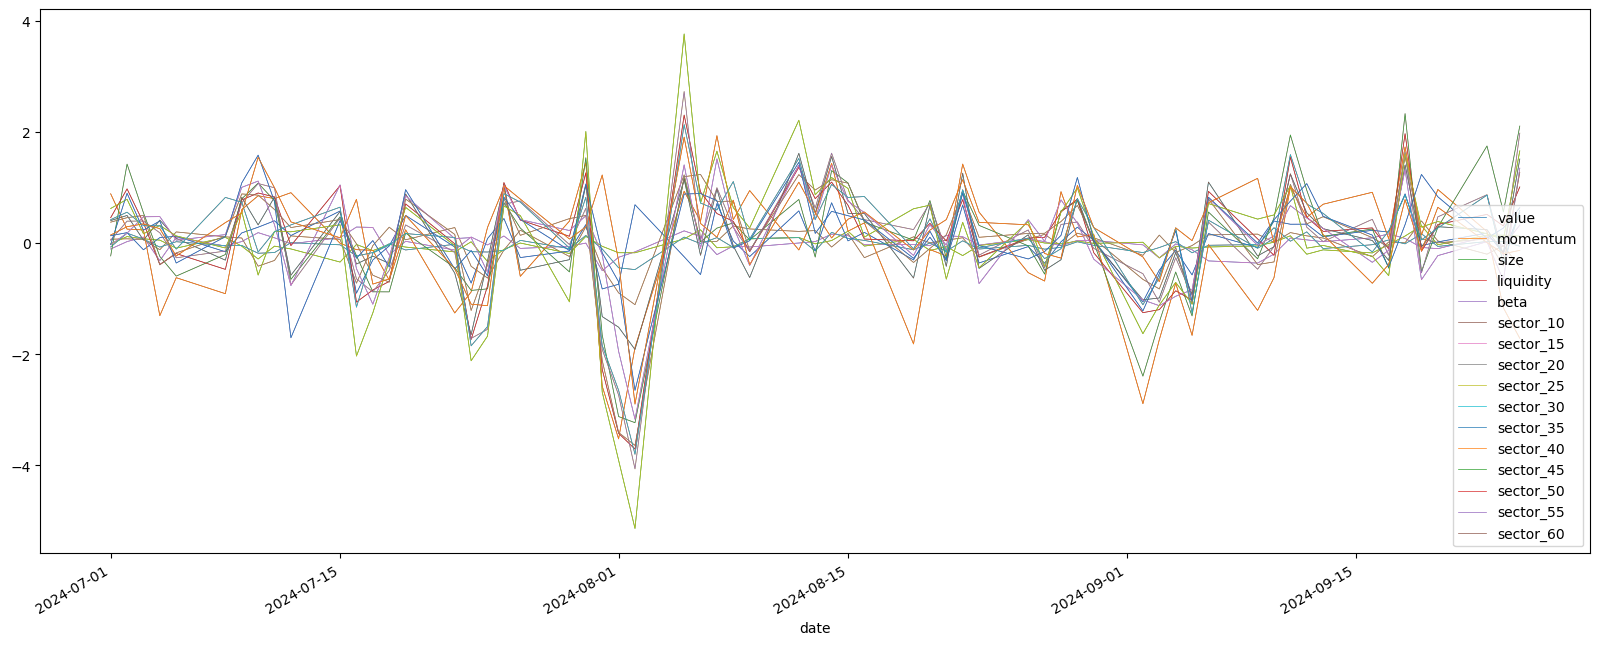

In [28]:
beta_df.plot(linewidth=0.5)
plt.savefig(r'C:\Users\Nate\Documents\Code\School\Lazy Prices\PythonCode\Attribution.png')
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(beta_df, linewidth=0.5)